# Imports:

In [1]:
from common import CosenoidSignal
from modulations import DSBModulatedSignal

# 1) Modulação AM-DSB de um sinal cossenoidal $m(t) = A_m \cos{\left( 2 \pi f_m t + \phi_m \right)}$:

Sinal cossenoindal no tempo e na frequência:

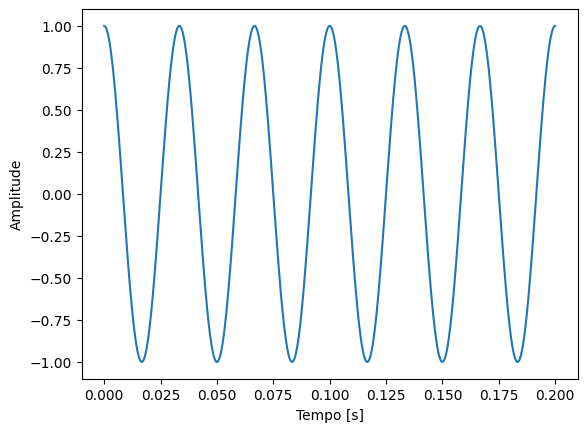

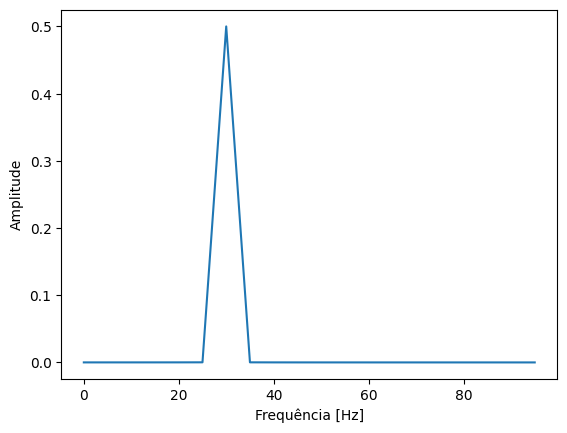

In [2]:
COSENOID_FREQUENCY = 30  # Hertz
SAMPLE_RATE = 100_000  # Hertz
SAMPLE_LENGTH = 0.2  # seconds
COSENOID_AMPLITUDE = 1
COSENOID_PHASE = 0  # degrees

cosenoid_signal = CosenoidSignal(COSENOID_FREQUENCY, SAMPLE_RATE, SAMPLE_LENGTH,
                                 amplitude=COSENOID_AMPLITUDE, phase=COSENOID_PHASE)
cosenoid_signal.signal.plot_data()
cosenoid_signal.signal.plot_fourier(start_index=0, end_index=20)

Portadora $c(t) = A_c \cos{\left( 2 \pi f_c t + \phi_c \right)}$:

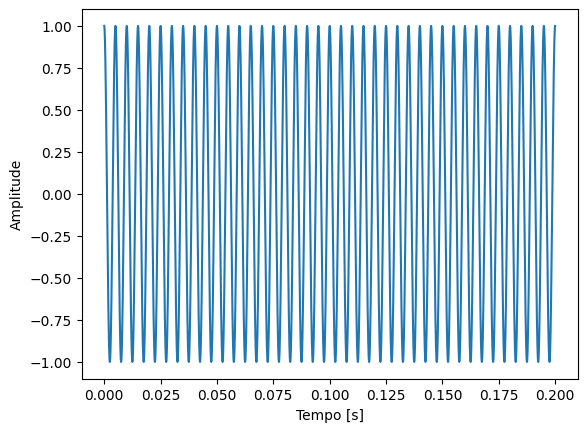

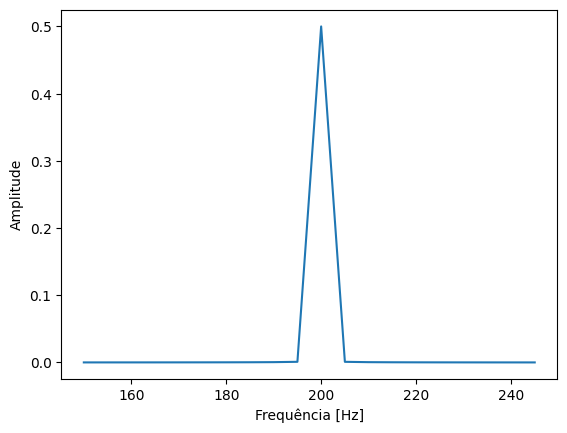

In [3]:
CARRIER_FREQUENCY = 200  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

carrier = CosenoidSignal(CARRIER_FREQUENCY, SAMPLE_RATE, SAMPLE_LENGTH,
                         amplitude=CARRIER_AMPLITUDE, phase=CARRIER_PHASE)
carrier.signal.plot_data()
carrier.signal.plot_fourier(start_index=30, end_index=50)

Sinal modulado $s(t) = A_c \left[ 1 + k_a A_m \cos{\left( 2 \pi f_m t + \phi_m \right)} \right] \cos{\left( 2 \pi f_c t \right)}$:

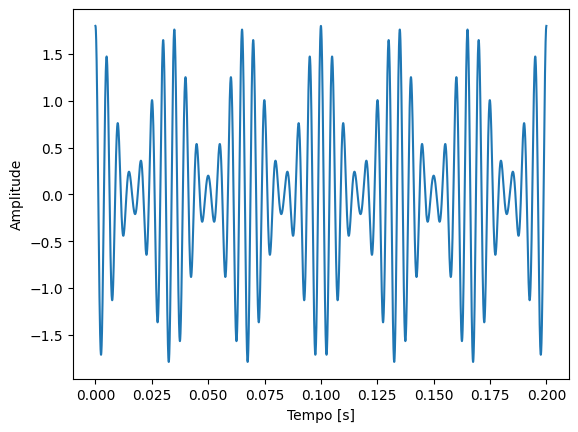

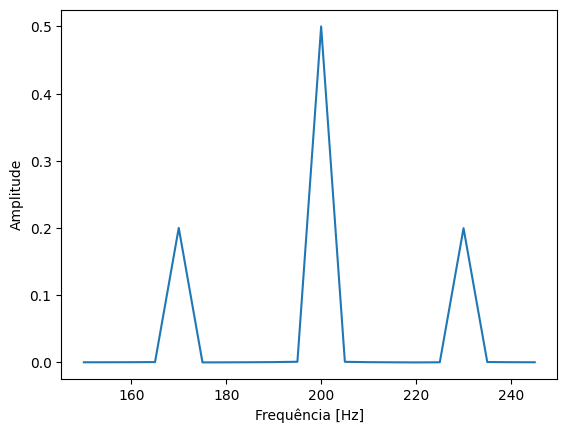

In [4]:
COHERENT_FILTER_ORDER = 7
COHERENT_CUTOFF_FREQUENCY = 100

k_a_max = - 1 / cosenoid_signal.signal.data_array.min()
k_a = 0.8 * k_a_max
dsb_modulated_signal = DSBModulatedSignal(
    cosenoid_signal, carrier, k_a,
    COHERENT_FILTER_ORDER, COHERENT_CUTOFF_FREQUENCY
    )
dsb_modulated_signal.modulated.plot_data()
dsb_modulated_signal.modulated.plot_fourier(start_index=30, end_index=50)

Demodulação:

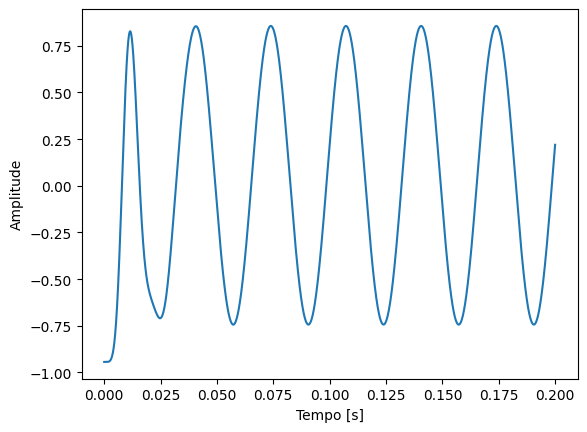

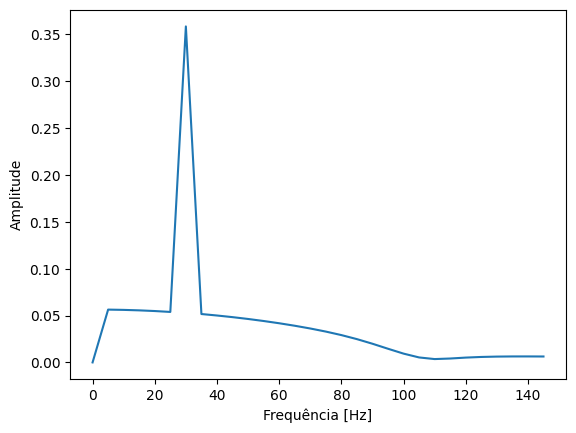

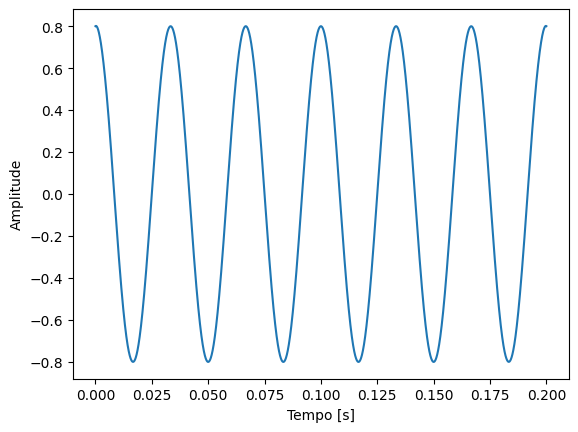

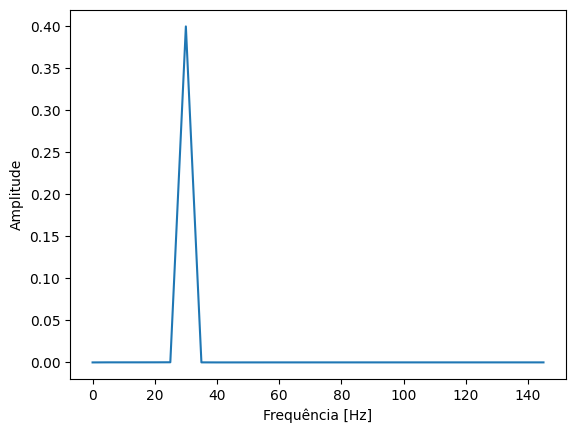

In [5]:
dsb_modulated_signal.demodulated['coherent'].plot_data()
dsb_modulated_signal.demodulated['coherent'].plot_fourier(start_index=0, end_index=30)
dsb_modulated_signal.demodulated['noncoherent'].plot_data()
dsb_modulated_signal.demodulated['noncoherent'].plot_fourier(start_index=0, end_index=30)